<a href="https://colab.research.google.com/github/C00276177Tomas/DataScienceModule/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-1-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


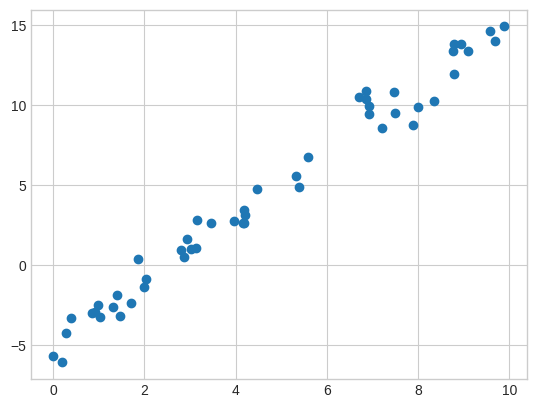

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

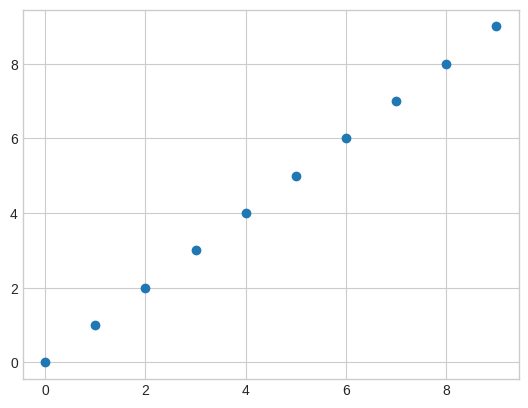

In [ ]:
x = [0,1,2,3,4,5,6,7,8,9]
y = [0,1,2,3,4,5,6,7,8,9]
plt.scatter(x, y);

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

TypeError: list indices must be integers or slices, not tuple

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

NameError: name 'poly_model' is not defined

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     1.4999999999999996
Model intercept: 0.5000000000000033


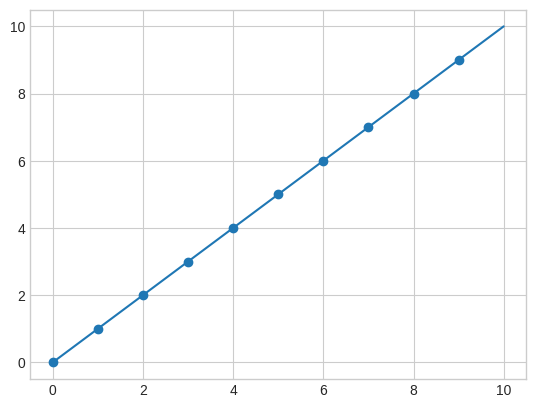

In [ ]:
import numpy as np

x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([0,1,2,3,4,5,6,7,8,9])
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

# Load the data from CSV files
d1 = pd.read_csv("ResultDataSet1.csv", sep=';')
d2 = pd.read_csv("ResultDataSet2.csv", sep=';')

# Concatenate the two dataframes vertically
combined_df = pd.concat([d1, d2], ignore_index=True)

# These are the columns that were chosen for the independent variables
specified_columns = ["traveltime", "studytime", "failures", "freetime",
                     "goout", "health", "absences", "G1", "G2"]

# Filter the combined dataframe to keep only the specified columns
filtered_df = combined_df[specified_columns]

# Replace NaN values with the median of each column
for column in filtered_df.columns:
    filtered_df[column].fillna(filtered_df[column].median(), inplace=True)

# Print the resulting dataframe
print(filtered_df)

      traveltime  studytime  failures  freetime  goout  health  absences  G1  \
0              2          2         0         3      4       3         6   5   
1              1          2         0         3      3       3         4   5   
2              1          2         3         3      2       3        10   7   
3              1          3         0         2      2       5         2  15   
4              1          2         0         3      2       5         4   6   
...          ...        ...       ...       ...    ...     ...       ...  ..   
1039           1          3         1         4      2       5         4  10   
1040           1          2         0         3      4       1         4  15   
1041           2          2         0         1      1       5         6  11   
1042           2          1         0         4      5       2         6  10   
1043           3          1         0         4      1       5         4  10   

      G2  
0      6  
1      5  
2     

<ipython-input-11-e03bed455706>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df[column].fillna(filtered_df[column].median(), inplace=True)
<ipython-input-11-e03bed455706>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[column].fillna(filtered_df[column].median(), inplace=True)


In [ ]:
from sklearn import linear_model

X = combined_df[specified_columns]

# Target (dependent variable)
y = combined_df['G3']  # Replace with the actual column you're trying to predict

# Fit the linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)



LinearRegression()

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

specified_columns = ["traveltime", "studytime", "failures", "freetime",
                     "goout", "health", "absences", "G1", "G2"]

# Feature matrix (independent variables)
X = combined_df[specified_columns]  # Extracting specified columns from the DataFrame

# Target variable (dependent variable)
y = combined_df['G3']

# Split the data into training (60%) and remaining sets (40%)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the remaining set into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the validation set
y_val_pred = reg.predict(X_val)

# Calculate RMSE for validation set
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print("Validation RMSE:", val_rmse)

# Make predictions of the test set
y_test_pred = reg.predict(X_test)

# Calculate RMSE for test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test RMSE:", test_rmse)

Validation RMSE: 1.7147224395034242
Test RMSE: 1.7420317870326667


In [ ]:
print("Independent variables (features) column headings (X):")
print(X.columns.tolist())  # Convert to list for better formatting

print("\nDependent variable heading (y):")
print(y.name)

Independent variables (features) column headings (X):
['traveltime', 'studytime', 'failures', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2']

Dependent variable heading (y):
G3


In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np

print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
# Calculate Root Mean Square Error (RMSE)
y_pred = reg.predict(X)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error:", rmse)

Coefficients: [ 0.14896895 -0.04861523 -0.2704855   0.00789948 -0.00296917  0.00333336
  0.02560888  0.12795244  0.96272253]
Intercept: -1.1206756288467563
Root Mean Square Error: 1.5635672088125643


In [ ]:
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(rmse)

In [ ]:
#  ["traveltime", "studytime", "failures", "freetime",
#                      "goout", "health", "absences", "G1", "G2"]
reg.predict([[2,2,0,3,4,3,6,15,5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.98840614])

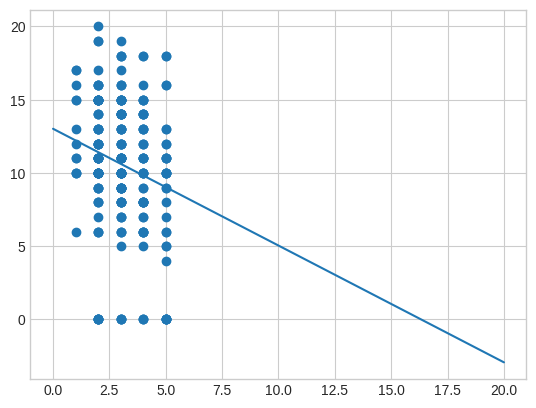

In [ ]:
# Replace 'column_name' with the actual name of the column
studyTimeColumn = df['goout']
finalGradeColumn = df['G3']

x = np.array(studyTimeColumn)
y = np.array(finalGradeColumn)

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 20, 20)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

x array: 217
y array: 217
x array: [4, 3, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 3, 3, 2, 4, 3, 2, 5, 3, 1, 2, 1, 4, 2, 2, 2, 4, 3, 5, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 3, 3, 3, 1, 3, 2, 5, 2, 3, 4, 3, 3, 5, 4, 4, 4, 2, 2, 2, 3, 4, 5, 3, 4, 4, 3, 3, 3, 3, 2, 2, 3, 4, 2, 3, 3, 3, 3, 1, 3, 2, 2, 4, 3, 2, 4, 4, 3, 2, 3, 3, 5, 3, 3, 4, 2, 3, 5, 4, 5, 5, 3, 3, 5, 4, 3, 2, 3, 5, 5, 3, 2, 2, 2, 2, 4, 3, 2, 4, 3, 3, 4, 2, 4, 4, 5, 2, 2, 5, 4, 1, 4, 2, 3, 2, 4, 2, 2, 5, 4, 1, 1, 4, 2, 5, 2, 5, 4, 3, 5, 2, 5, 3, 2, 2, 4, 5, 4, 4, 4, 3, 3, 3, 3, 2, 3, 2, 4, 3, 3, 3, 3, 3, 3, 4, 2, 3, 2, 3, 4, 4, 2, 5, 3, 4, 2, 5, 3, 3, 2, 2, 2, 3, 5, 4, 4, 1, 4, 5, 4, 3, 3, 5, 1, 3, 2, 3, 4, 3, 2, 3, 3, 2, 5, 4, 2, 3]
y array: [6, 6, 10, 15, 10, 15, 11, 6, 19, 15, 9, 12, 14, 11, 16, 14, 14, 10, 5, 10, 15, 15, 16, 12, 8, 8, 11, 15, 11, 11, 12, 17, 16, 12, 15, 6, 18, 15, 11, 13, 11, 12, 18, 11, 9, 6, 11, 20, 14, 7, 13, 13, 10, 11, 13, 10, 15, 15, 9, 16, 11, 11, 9, 9, 10, 15, 12, 6, 8, 16, 15, 10, 5, 14, 11, 10, 10, 11, 10, 5, 1

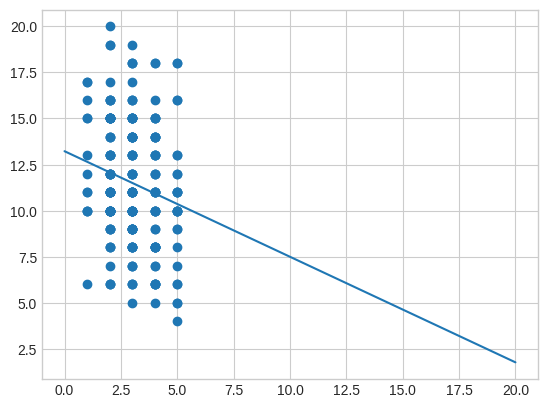

In [ ]:
# find all final grades that are 0 and delete coresponding study value

studyTimeColumn = df['goout']
finalGradeColumn = df['G3']

x = np.array(studyTimeColumn)
y = np.array(finalGradeColumn)

xFiltered = []
yFiltered = []

for i in range(len(x)):
    if y[i] != 0:
        xFiltered.append(x[i])
        yFiltered.append(y[i])

x = np.array(xFiltered)
y = np.array(yFiltered)

print("x array:", len(xFiltered))
print("y array:", len(yFiltered))

print("x array:", xFiltered)
print("y array:", yFiltered)

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 20, 20)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);